In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_1 = pd.read_stata('ps1q1.dta')
data_2 = pd.read_stata('ps1q2.dta')

In [3]:
data_1.shape

(11, 8)

In [4]:
data_1

,X1,Y1,X2,Y2,X3,Y3,X4,Y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [59]:
Y = data_1['Y1']
X = data_1['X1']
X = sm.add_constant(X)

In [60]:
model = sm.OLS(Y,X)
results = model.fit()

In [61]:
results.params

const    3.000091
X1       0.500091
dtype: float64

Text(0,0.5,'Y1')

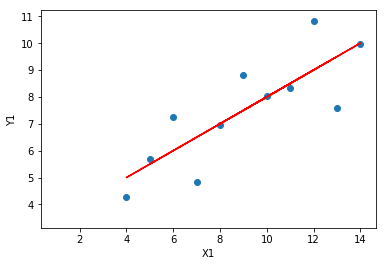

In [62]:
plt.scatter(data_1['X1'],data_1['Y1'])
plt.plot(X, X*0.500091 + 3.000091, 'r')
plt.xlabel('X1')
plt.ylabel('Y1')

In [63]:
data_1.describe()

,X1,Y1,X2,Y2,X3,Y3,X4,Y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500908,9.000000,7.500909,9.000000,7.500000,9.000000,7.500908
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579
min,4.000000,4.260000,4.000000,3.100000,4.000000,5.390000,8.000000,5.250000
25%,6.500000,6.315000,6.500000,6.695000,6.500000,6.250000,8.000000,6.170000
50%,9.000000,7.580000,9.000000,8.140000,9.000000,7.110000,8.000000,7.040000
75%,11.500000,8.570000,11.500000,8.950000,11.500000,7.980000,8.000000,8.190000
max,14.000000,10.840000,14.000000,9.260000,14.000000,12.740000,19.000000,12.500000


In [5]:
x_vals = [x for x in data_1.columns[::2]]
y_vals = [y for y in data_1.columns if y not in x_vals]

In [7]:
count = 1
for x,y in zip(x_vals,y_vals):
    correlation = np.corrcoef(data_1[x], data_1[y])[0, 1]
    covariance = np.cov(data_1[x], data_1[y], bias=False)[0][1]
    print ('covariance between X{} and Y{} is'.format(count,count),'{0:.2f}'.format(covariance))
    print ('correlation between X{} and Y{} is'.format(count,count),'{0:.2f}'.format(correlation))
    print (' ')
    count +=1

covariance between X1 and Y1 is 5.50
correlation between X1 and Y1 is 0.82
 
covariance between X2 and Y2 is 5.50
correlation between X2 and Y2 is 0.82
 
covariance between X3 and Y3 is 5.50
correlation between X3 and Y3 is 0.82
 
covariance between X4 and Y4 is 5.50
correlation between X4 and Y4 is 0.82
 


In [68]:
# OLS estimates for X2,Y2

Y = data_1['Y2']
X = data_1['X2']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const    3.000909
X2       0.500000
dtype: float64

Text(0,0.5,'Y2')

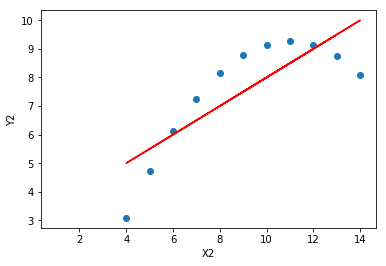

In [69]:
plt.scatter(data_1['X2'],data_1['Y2'])
plt.plot(X, X*0.500000 + 3.000909, 'r')
plt.xlabel('X2')
plt.ylabel('Y2')

In [75]:
# OLS estimates for X3,Y3

Y = data_1['Y3']
X = data_1['X3']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const    3.002455
X3       0.499727
dtype: float64

Text(0,0.5,'Y3')

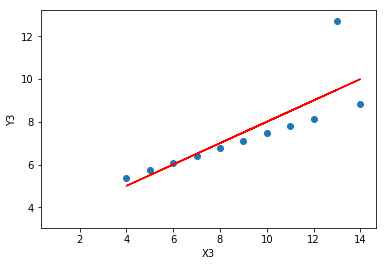

In [76]:
plt.scatter(data_1['X3'],data_1['Y3'])
plt.plot(X, X*0.499727 + 3.002455, 'r')
plt.xlabel('X3')
plt.ylabel('Y3')

In [77]:
# OLS estimates for X4,Y4

Y = data_1['Y4']
X = data_1['X4']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const    3.001727
X4       0.499909
dtype: float64

Text(0,0.5,'Y4')

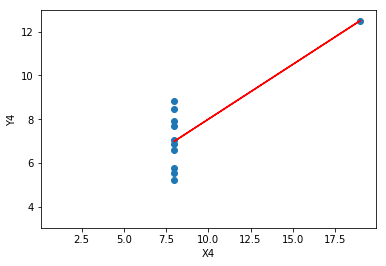

In [78]:
plt.scatter(data_1['X4'],data_1['Y4'])
plt.plot(X, X*0.499909 + 3.001727, 'r')
plt.xlabel('X4')
plt.ylabel('Y4')

In [74]:
# OLS estimates for X4,Y4

sendem = data_2['SenDem']
tax20 = data_2['Tax20']
np.corrcoef(sendem, tax20)[0, 1]

0.4609298994351103

In [15]:
# OLS estimates for a0, a1

Y = tax20
X = sendem
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const     15.863625
SenDem     0.308719
dtype: float64

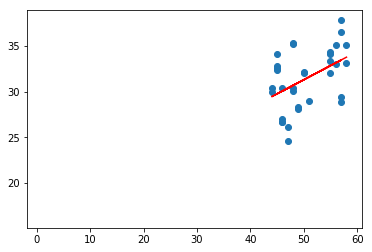

In [16]:
plt.scatter(sendem,tax20)
plt.plot(X, X*0.308719 + 15.863625, 'r')

In [17]:
# OLS estimates for b0, b1

Y = sendem
X = tax20
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const    28.770300
Tax20     0.688186
dtype: float64

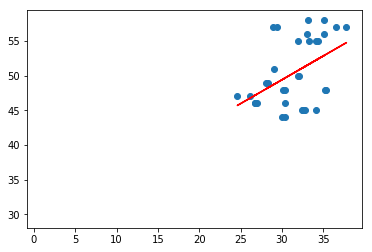

In [18]:
plt.scatter(tax20,sendem)
plt.plot(X, X*0.688186 + 28.770300, 'r')

In [19]:
hsedem = data_2['HseDem']

# OLS estimates for y0, y1

Y = tax20
X = hsedem
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

const     31.441464
HseDem    -0.000085
dtype: float64

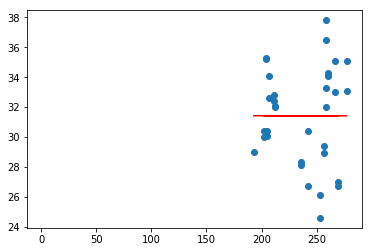

In [20]:
plt.scatter(hsedem,tax20)
plt.plot(X, X*-0.000085 + 31.441464, 'r')